In [7]:
import sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [8]:
dataframe = pd.DataFrame(data.data, columns=data.feature_names)
print(dataframe)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

C:\Users\cecil\AppData\Local\Temp\ipykernel_19852\861731988.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], cmap='viridis', alpha=0.7)


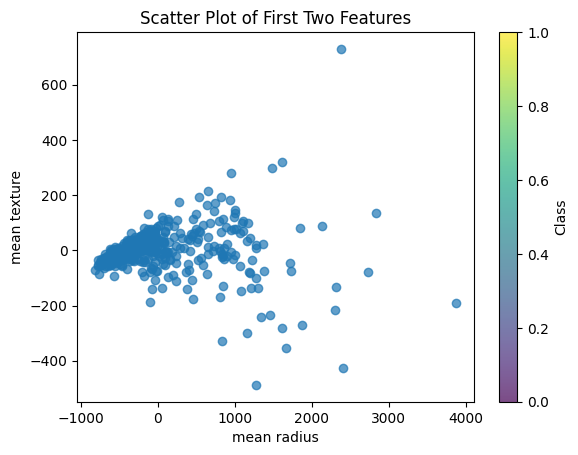

In [9]:
# Apply PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train)



# Create a scatter plot of the first two features
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], cmap='viridis', alpha=0.7)
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title("Scatter Plot of First Two Features")
plt.colorbar(label='Class')
plt.show()

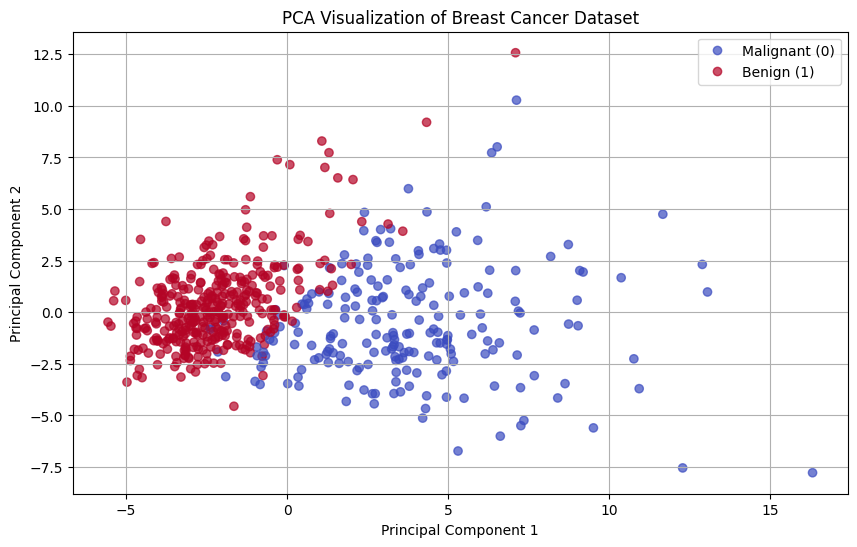

Explained variance ratio: [0.44272026 0.18971182]
Total explained variance: 0.6324320765155946
explained variance:  [13.30499079  5.7013746 ]


In [12]:
#Load dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target

#Standardize the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns=["target"]))

#Apply PCA (reduce to 2 dimensions for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#Convert to DataFrame
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["target"] = df["target"]

#Plot the PCA-transformed data
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_pca["PC1"], df_pca["PC2"], c=df_pca["target"], cmap="coolwarm", alpha=0.7)

#Add legend
plt.legend(handles=scatter.legend_elements()[0], labels=["Malignant (0)", "Benign (1)"])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization of Breast Cancer Dataset")
plt.grid(True)
plt.show()

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total explained variance:", sum(pca.explained_variance_ratio_))

print("explained variance: ", pca.explained_variance_)



   Cluster  target
0        0       0
1        0       0
2        0       0
3        0       0
4        0       0


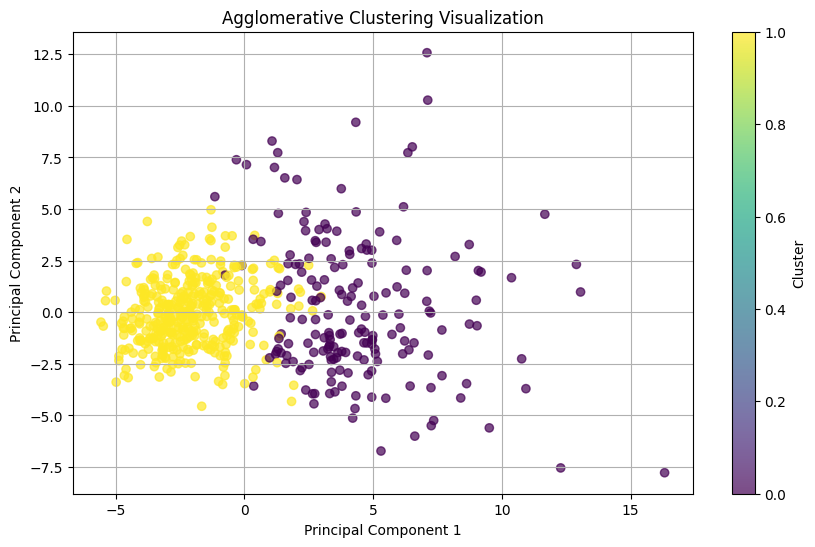

In [18]:
from sklearn.cluster import AgglomerativeClustering

# Perform Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=2)
clusters = agg_clustering.fit_predict(X_scaled)

# Add the cluster labels to the dataframe
df["Cluster"] = clusters

# Display the first few rows of the dataframe with cluster labels
print(df[["Cluster", "target"]].head())

# Visualize the clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_pca["PC1"], df_pca["PC2"], c=df["Cluster"], cmap="viridis", alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Agglomerative Clustering Visualization")
plt.colorbar(scatter, label="Cluster")
plt.grid(True)
plt.show()

In [20]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Perform Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=2)
clusters = agg_clustering.fit_predict(X_scaled)

# Add the cluster labels to the dataframe
df["Cluster"] = clusters

# Compare with actual labels
ari = adjusted_rand_score(df["target"], df["Cluster"])
nmi = normalized_mutual_info_score(df["target"], df["Cluster"])

print(f"Adjusted Rand Index (ARI): {ari:.4f}")
print(f"Normalized Mutual Information (NMI): {nmi:.4f}")

# Display the first few rows of the dataframe with cluster labels and actual labels
print(df[["Cluster", "target"]].head())

Adjusted Rand Index (ARI): 0.5750
Normalized Mutual Information (NMI): 0.4569
   Cluster  target
0        0       0
1        0       0
2        0       0
3        0       0
4        0       0
